In [34]:
# !pip install transformers
# !pip install tensorflow
# !pip install pytorch-nlp

In [35]:
# from transformers import BertTokenizer, TFBertForSequenceClassification
# from transformers import InputExample, InputFeatures

# model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
# tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [36]:
# model.summary()

In [2]:
import tensorflow as tf
import numpy as np
from sklearn import metrics
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import nltk
import re
from pytorch_pretrained_bert import BertModel




ModuleNotFoundError: No module named 'pytorch_pretrained_bert'

In [38]:
class Config:
    batch_size = 128
    epochs = 10
    embed_dim = 128
    validation_split = 0.15
    maxlen = 192
    vocab_size = 10000
    labels = np.array(["neg", "pos"])
    num_classes = len(labels)
    label_display_names = np.array(["Negative", "Positive"])
    model_path = "model.tf"
config = Config()

In [39]:
# load data
data = pd.read_csv('../00_source_data/imdb_master.csv', encoding="unicode_escape")
data.head(10)

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt
5,5,test,"A funny thing happened to me while watching ""M...",neg,10004_2.txt
6,6,test,This German horror film has to be one of the w...,neg,10005_2.txt
7,7,test,"Being a long-time fan of Japanese film, I expe...",neg,10006_2.txt
8,8,test,"""Tokyo Eyes"" tells of a 17 year old Japanese g...",neg,10007_4.txt
9,9,test,Wealthy horse ranchers in Buenos Aires have a ...,neg,10008_4.txt


<AxesSubplot: >

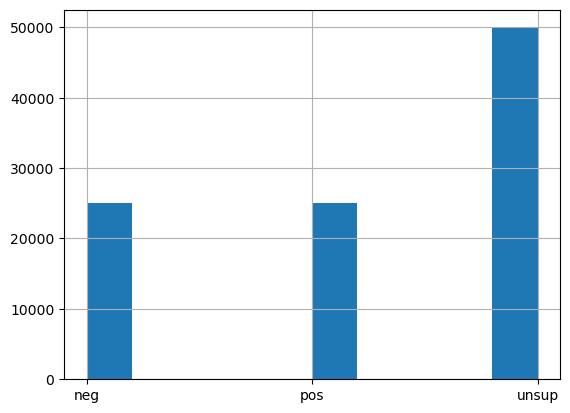

In [40]:
data["label"].hist()

In [41]:
data = data[(data["label"] == "neg") | (data["label"] == "pos")]

<AxesSubplot: >

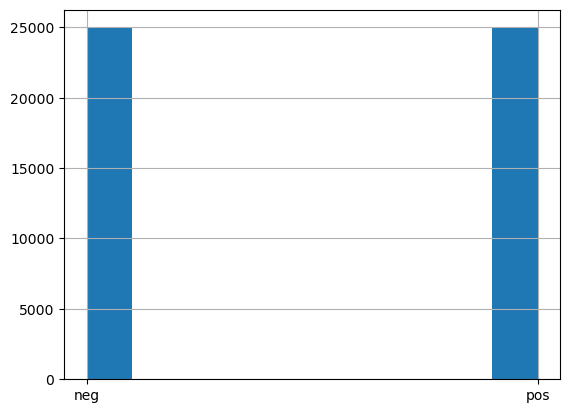

In [42]:
data["label"].hist()

## Build a TextVectorization layer

In [43]:
vectorizer = layers.TextVectorization(
    max_tokens=config.vocab_size, 
    output_sequence_length=config.maxlen
)
vectorizer.adapt(data["review"])

In [44]:
vocab = vectorizer.get_vocabulary()
len(vocab)

10000

In [45]:
vocab[:10]

['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it']

In [46]:
# data preprocessing
# 1. Remove the HTML tags
# 2. Remove any punctuations or a limited set of special characters like, or . or #, etc.
# 3. Check if the word is made up of English letters and is not alpha-numeric
# 4. Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)
# 5. Convert the word to lowercase
# 6. Remove Stopwords (the, and, a ...)
# 7. Finally Snowball Stemming (remove -ing, -ly, ...)

# stop = set(stopwords.words('english'))
# sno = nltk.stem.SnowballStemmer('english')

# def cleanhtml(sentence):
#     cleanr = re.compile('<.*?>')
#     cleantext = re.sub(cleanr, ' ', sentence)
#     return cleantext

# def cleanpunc(sentence):
#     cleaned = re.sub(r'[?|!|\'|"|#]', r'', sentence)
#     cleaned = re.sub(r'[.|,|)|(|\|/]', r' ', cleaned)
#     return cleaned

In [47]:
# i=0
# str1=' '
# final_string=[]
# all_positive_words=[] 
# all_negative_words=[] 
# s=''
# for sent in data['review'].values:
#     filtered_sentence=[]
#     sent=cleanhtml(sent) 
#     for w in sent.split():
#         for cleaned_words in cleanpunc(w).split():
#             if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
#                 if(cleaned_words.lower() not in stop):
#                     s=(sno.stem(cleaned_words.lower())).encode('utf8')
#                     filtered_sentence.append(s)
#                     if (data['label'].values)[i] == "pos": 
#                         all_positive_words.append(s) 
#                     if(data['label'].values)[i] == "neg":
#                         all_negative_words.append(s) 
#                 else:
#                     continue
#             else:
#                 continue 
    
#     str1 = b" ".join(filtered_sentence) 
#     final_string.append(str1)
#     i+=1

In [48]:
# add cleaned_review column
# data['cleaned_review'] = final_string

In [49]:
# add score column
# def posneg(x):
#     if x == 'neg':
#         return 0
#     elif x == 'pos':
#         return 1
#     return x

# filtered_score = data['label'].map(posneg)
# data['score'] = filtered_score

## Convert labels to numerical values

In [50]:
labels = list(Config.labels)
data["label"] = data["label"].apply(lambda label: labels.index(label))

In [51]:
data.head(5)

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,0,0_2.txt
1,1,test,This is an example of why the majority of acti...,0,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",0,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,0,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,0,10003_3.txt


In [52]:
sentences = list(data.iloc[np.random.choice(data.shape[0], 10)]["review"])
print(sentences)

["2 stars for Kay Francis -- she's wonderful! And she didn't deserve this horrible tripe that Warner Bros. threw her way! <br /><br />The two-pronged premise that this movie is based on is ridiculous and unbelievable in the extreme. Kay is a small-town wife and mother who yearns for something bigger: she wants to be an actress. When a big-shot actor comes to town and invites Kay to his hotel to talk about possibilities, Kay tells her husband she's going to the movies. The hubby's biddy of a mother puts a bug in hubby's ear that Kay's not being truthful, and he sets out looking for her. He finds her w/ the actor in the hotel (they are only talking!) and he slugs the guy, who falls over a railing, lands face-first in a pond (lake?), and dies. Now here's the two unbelievable premises upon which the rest of the movie is based: <br /><br />1) the judge tells the jury that if it's determined that the man died *before* his head went into the water, that they must find the hubby guilty of firs

In [53]:
vectorizer(sentences)

<tf.Tensor: shape=(10, 192), dtype=int64, numpy=
array([[ 284,  414,   17, ...,    1,    4,  220],
       [1850,    1,    2, ...,    2,    1, 1230],
       [2565, 2329,    8, ...,    6,   27, 1163],
       ...,
       [  10,  202,   11, ...,   45, 1027, 1615],
       [ 254, 5186, 6208, ...,    1,   35,   81],
       [  44,    2, 2530, ...,    0,    0,    0]])>

### Train test split

In [54]:
# divide data into train and test
train, test = train_test_split(data, shuffle=True, test_size=config.validation_split, random_state=42)
train.shape, test.shape

((42500, 5), (7500, 5))

In [55]:
train_ds = tf.data.Dataset.from_tensor_slices((train["review"], train["label"])).batch(config.batch_size)
train_ds = train_ds.shuffle(256).take(train.shape[0] // config.batch_size).cache().repeat(1).prefetch(16)

In [56]:
test_ds = tf.data.Dataset.from_tensor_slices((test["review"], test["label"])).batch(config.batch_size)
test_ds = test_ds.take(test.shape[0] // config.batch_size).cache().repeat(1).prefetch(16)

In [57]:
for x, y in train_ds.take(1):
    print(x.shape, y.shape)
    print(x[:2])
    print(y[:2])

(128,) (128,)
tf.Tensor(
[b'This movie was horrible, simply put. It was so bad I registered with IMDb to warn you of its dangers.<br /><br />I am a campy horror film expert, per se. I have watched "Redneck Zombies", "House of the Psychotic Women", "Slumber Party Massacre II" and many others. I know my schlock. And I know this movie sucks.<br /><br />Three fourths of the film is comprised of scared individuals running from one side of the screen to the other. When they are not running, they are spouting non-sequitur lines, devoid of emotion or motivation. When the actors begin to be acceptable, the direction falls to pieces. There were so many jarring low-angle shots; I figured Leif Jonker had a 3 foot tall tripod. He used what I call the "Leif Maneuver" several millions times: that is, zooming out from an object of interest like an amateur. Apparently the film crew couldn\'t get up early enough to film a sunrise, so they filmed a sunset... and played it in reverse. With direction this 

2022-12-10 18:36:22.923068: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


## MODEL

In [1]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

NameError: name 'BertTokenizer' is not defined

In [58]:
def get_model():
    model = keras.Sequential([
        layers.Input((None, ), dtype="string"),
        vectorizer,
        layers.Embedding(config.vocab_size, config.embed_dim, mask_zero=True),
        layers.Bidirectional(layers.LSTM(32, return_sequences=True)),
        layers.LSTM(32),
        layers.GaussianDropout(0.5),
        layers.Dense(config.num_classes, activation="softmax")
    ])
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [59]:
model = get_model()

ValueError: Exception encountered when calling layer "text_vectorization_1" (type TextVectorization).

When using `TextVectorization` to tokenize strings, the input rank must be 1 or the last shape dimension must be 1. Received: inputs.shape=(None, None) with rank=2

Call arguments received by layer "text_vectorization_1" (type TextVectorization):
  • inputs=tf.Tensor(shape=(None, None), dtype=string)

In [ ]:
model.summary()

NameError: name 'model' is not defined